In [2]:
import pandas as pd, numpy as np

In [7]:
import seaborn as sns

In [3]:
df = pd.read_csv('../data/m5-forecasting-accuracy/sales_train_evaluation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [4]:
df.corr()

C:\Users\alekm\AppData\Local\Temp\ipykernel_16052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
d_1,1.000000,0.894945,0.819378,0.805792,0.790104,0.825835,0.813880,0.851729,0.838286,0.760621,...,0.448557,0.427984,0.419846,0.386245,0.394730,0.398653,0.395844,0.466658,0.449075,0.449002
d_2,0.894945,1.000000,0.824156,0.822570,0.817022,0.814014,0.803917,0.841215,0.840235,0.762596,...,0.428693,0.401477,0.392254,0.365031,0.362578,0.371138,0.370891,0.438967,0.422788,0.422485
d_3,0.819378,0.824156,1.000000,0.777682,0.753741,0.790992,0.758745,0.777716,0.785025,0.710665,...,0.442363,0.426264,0.405135,0.378902,0.377483,0.387174,0.393100,0.446114,0.431127,0.433783
d_4,0.805792,0.822570,0.777682,1.000000,0.817413,0.829412,0.821976,0.821191,0.798350,0.743539,...,0.399438,0.387039,0.384761,0.371044,0.361262,0.357351,0.363434,0.402062,0.391408,0.401719
d_5,0.790104,0.817022,0.753741,0.817413,1.000000,0.814588,0.787646,0.771953,0.788582,0.770601,...,0.399823,0.384342,0.388384,0.357039,0.356491,0.367121,0.356084,0.408287,0.393536,0.404352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0.398653,0.371138,0.387174,0.357351,0.367121,0.382098,0.391096,0.401021,0.394732,0.371038,...,0.696379,0.701416,0.702900,0.692700,0.717609,1.000000,0.698250,0.720684,0.708208,0.730667
d_1938,0.395844,0.370891,0.393100,0.363434,0.356084,0.390764,0.392195,0.396135,0.390437,0.361792,...,0.715970,0.716162,0.706530,0.677848,0.694022,0.698250,1.000000,0.719033,0.712089,0.711371
d_1939,0.466658,0.438967,0.446114,0.402062,0.408287,0.444709,0.450098,0.453849,0.452654,0.407245,...,0.761440,0.738371,0.731476,0.700345,0.717229,0.720684,0.719033,1.000000,0.770046,0.769700
d_1940,0.449075,0.422788,0.431127,0.391408,0.393536,0.433790,0.452550,0.453006,0.455505,0.402681,...,0.751717,0.746196,0.735662,0.697596,0.713828,0.708208,0.712089,0.770046,1.000000,0.772883


In [6]:
df.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)

C:\Users\alekm\AppData\Local\Temp\ipykernel_16052\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

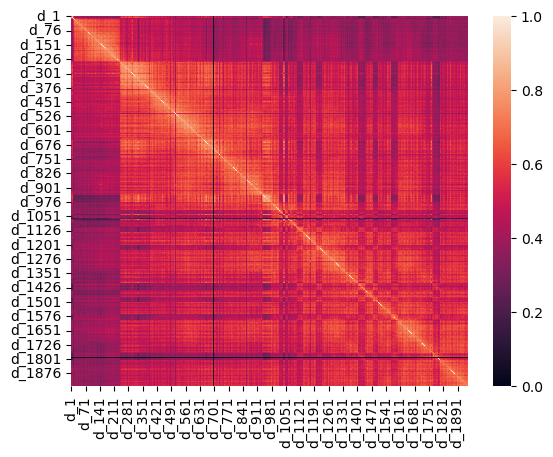

In [8]:
sns.heatmap(df.corr())

In [9]:
df_sales = pd.read_csv("../data/m5-forecasting-accuracy/sell_prices.csv")
df_sales.store_id.value_counts()

TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: store_id, dtype: int64

In [23]:
df_sales.item_id.value_counts()

FOODS_3_587        2820
HOUSEHOLD_1_177    2820
HOUSEHOLD_2_283    2820
HOBBIES_1_337      2820
FOODS_1_032        2820
                   ... 
HOUSEHOLD_1_308     642
HOUSEHOLD_1_159     623
HOUSEHOLD_1_242     600
FOODS_3_296         592
FOODS_2_379         530
Name: item_id, Length: 3049, dtype: int64

In [22]:
food_data = df_sales.loc[df_sales.item_id.str.startswith("HOBBIES_2")]
food_data.item_id.value_counts()

HOBBIES_2_009    2819
HOBBIES_2_036    2819
HOBBIES_2_120    2819
HOBBIES_2_046    2818
HOBBIES_2_002    2818
                 ... 
HOBBIES_2_070     926
HOBBIES_2_109     867
HOBBIES_2_023     858
HOBBIES_2_026     730
HOBBIES_2_132     698
Name: item_id, Length: 149, dtype: int64

In [13]:
df_sales.wm_yr_wk.unique()

array([11325, 11326, 11327, 11328, 11329, 11330, 11331, 11332, 11333,
       11334, 11335, 11336, 11337, 11338, 11339, 11340, 11341, 11342,
       11343, 11344, 11345, 11346, 11347, 11348, 11349, 11350, 11351,
       11352, 11353, 11401, 11402, 11403, 11404, 11405, 11406, 11407,
       11408, 11409, 11410, 11411, 11412, 11413, 11414, 11415, 11416,
       11417, 11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425,
       11426, 11427, 11428, 11429, 11430, 11431, 11432, 11433, 11434,
       11435, 11436, 11437, 11438, 11439, 11440, 11441, 11442, 11443,
       11444, 11445, 11446, 11447, 11448, 11449, 11450, 11451, 11452,
       11501, 11502, 11503, 11504, 11505, 11506, 11507, 11508, 11509,
       11510, 11511, 11512, 11513, 11514, 11515, 11516, 11517, 11518,
       11519, 11520, 11521, 11522, 11523, 11524, 11525, 11526, 11527,
       11528, 11529, 11530, 11531, 11532, 11533, 11534, 11535, 11536,
       11537, 11538, 11539, 11540, 11541, 11542, 11543, 11544, 11545,
       11546, 11547,

In [24]:
df_small = pd.read_csv("../data/orders factory.csv")
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272973 entries, 0 to 1272972
Data columns (total 7 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   order    1272973 non-null  int64  
 1   costum   1272969 non-null  float64
 2   collect  1272973 non-null  object 
 3   prod     1272973 non-null  object 
 4   barcode  1245734 non-null  object 
 5   weight   1272973 non-null  float64
 6   pacs     1272973 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 68.0+ MB


In [29]:
np.shape(df_small.order.unique())

(85025,)

In [45]:
df_small['prod'].unique()

array(['112082CGVPS3', '9021', '12451C', ..., '121621cr', '9091',
       '144150SZHL'], dtype=object)

In [32]:
np.shape(df_small.order)[0]/np.shape(df_small.order.unique())[0]

14.971749485445457

In [41]:
df_grouped = df_small.groupby('order')


order
10                                                 [12451CR]
300                                                   [6037]
301                                                [15451CR]
361                                                   [8054]
25249      [11162CGVM3, 3007-9, 772082, 8032, 10451C, 122...
                                 ...                        
800322                                              [14451S]
800323                                             [10451CR]
800325                                             [10451CR]
800326                                             [10451CR]
3917836                                  [12451SHL, HLO451S]
Name: prod, Length: 85025, dtype: object

In [66]:
df_prod_per_order = df_grouped['prod'].unique().apply(pd.Series.value_counts)


,12451CR,6037,15451CR,8054,11162CGVM3,3007-9,772082,8032,10451C,122082C,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
order,,,,,,,,,,,,,,,,,,,,,
10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25249,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,12451CR,6037,15451CR,8054,11162CGVM3,3007-9,772082,8032,10451C,122082C,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
order,,,,,,,,,,,,,,,,,,,,,
10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25249,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_prod_per_order = df_grouped['prod'].unique().apply(lambda row: len(row))

In [64]:
df_prod_per_order

order
10         1
300        1
301        1
361        1
25249      6
          ..
800322     1
800323     1
800325     1
800326     1
3917836    2
Name: prod, Length: 85025, dtype: int64

In [55]:
df_prod_per_order.mean()

3.4541134960305793

In [72]:
product_matrix = np.zeros((1605,1605))
np.shape(product_matrix)

(1605, 1605)

In [84]:
df_products = pd.DataFrame(product_matrix,columns=df_prod_per_order.columns.tolist(), index=df_prod_per_order.columns.tolist())
df_products

,12451CR,6037,15451CR,8054,11162CGVM3,3007-9,772082,8032,10451C,122082C,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
12451CR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15451CR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11162CGVM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121621CR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934150CR1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121621cr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df_prod_per_order.fillna(0, inplace=True)

In [78]:
df_prod_per_order

,12451CR,6037,15451CR,8054,11162CGVM3,3007-9,772082,8032,10451C,122082C,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
order,,,,,,,,,,,,,,,,,,,,,
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25249,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# filtered_df = df_prod_per_order[df_prod_per_order.sum(axis=1) >= 2]

# find pairs of indices for non-zero values in each row
def get_index_pairs(row):
    non_zero_indices = np.argwhere(row.values)
    index_pairs = []
    for i in range(len(non_zero_indices)):
        for j in range(i+1, len(non_zero_indices)):
            index_pairs.append((non_zero_indices[i][0], non_zero_indices[j][0]))
    return index_pairs

index_pairs = filtered_df.apply(get_index_pairs, axis=1)
index_pairs


order
25249      [(4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6...
25252                         [(10, 11), (10, 12), (11, 12)]
25276      [(4, 9), (4, 10), (4, 12), (4, 13), (4, 14), (...
25284                                             [(21, 22)]
25303                         [(13, 23), (13, 24), (23, 24)]
                                 ...                        
800299                                          [(348, 676)]
800312                                         [(676, 1205)]
800318                    [(13, 205), (13, 808), (205, 808)]
800321                                         [(898, 1259)]
3917836                                        [(592, 1282)]
Length: 57848, dtype: object

In [85]:
for row in index_pairs:
    for pair in row:
        df_products.iloc[pair[0], pair[1]] += 1
df_products

,12451CR,6037,15451CR,8054,11162CGVM3,3007-9,772082,8032,10451C,122082C,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
12451CR,0.0,0.0,390.0,98.0,0.0,466.0,8.0,3.0,6.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15451CR,0.0,0.0,0.0,57.0,0.0,278.0,0.0,0.0,0.0,0.0,...,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8054,0.0,0.0,0.0,0.0,0.0,212.0,4.0,25.0,17.0,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11162CGVM3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121621CR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934150CR1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121621cr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:


# Assuming your raw data is in a pandas DataFrame called 'raw_data'
orders = df_small.groupby('order')['prod'].apply(set)
co_occurrence_matrix = pd.DataFrame(index=df_small['prod'].unique(), columns=df_small['prod'].unique()).fillna(0)

for order_products in orders:
    for product1 in order_products:
        for product2 in order_products:
            if product1 != product2:
                co_occurrence_matrix.loc[product1, product2] += 1
co_occurrence_matrix

,112082CGVPS3,9021,12451C,152082C,67451C,12162CRP,6037,15451CR,11162CGVM3,3007-9,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
112082CGVPS3,0,6,9,11,9,2,0,0,0,19,...,0,0,0,0,0,0,0,0,0,0
9021,6,0,25,14,17,4,0,80,0,582,...,0,0,0,0,0,2,0,0,0,0
12451C,9,25,0,17,40,4,0,1,0,88,...,0,0,0,0,0,0,0,0,0,0
152082C,11,14,17,0,30,0,0,0,0,37,...,0,0,0,0,0,0,0,0,0,0
67451C,9,17,40,30,0,4,0,0,0,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121621CR,0,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
934150CR1.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121621cr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
product_counts = df_small.groupby('prod').count().order

In [102]:
co_occurrence_matrix.index

Index(['112082CGVPS3', '9021', '12451C', '152082C', '67451C', '12162CRP',
       '6037', '15451CR', '11162CGVM3', '3007-9',
       ...
       '10451CRZ', '144150CRZHL', '51012', '134511CR', '172082cr', '121621CR',
       '934150CR1.6', '121621cr', '9091', '144150SZHL'],
      dtype='object', length=1605)

In [105]:
product_counts = product_counts.reindex(co_occurrence_matrix.index)

In [90]:
co_occurrence_matrix.loc['152082C','112082CGVPS3']

11

In [92]:
df_products.loc['112082CGVPS3','152082C']

11.0

In [107]:
co_occurrence_matrix

,112082CGVPS3,9021,12451C,152082C,67451C,12162CRP,6037,15451CR,11162CGVM3,3007-9,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
112082CGVPS3,0,6,9,11,9,2,0,0,0,19,...,0,0,0,0,0,0,0,0,0,0
9021,6,0,25,14,17,4,0,80,0,582,...,0,0,0,0,0,2,0,0,0,0
12451C,9,25,0,17,40,4,0,1,0,88,...,0,0,0,0,0,0,0,0,0,0
152082C,11,14,17,0,30,0,0,0,0,37,...,0,0,0,0,0,0,0,0,0,0
67451C,9,17,40,30,0,4,0,0,0,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121621CR,0,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
934150CR1.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121621cr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
scaled_matrix = co_occurrence_matrix/product_counts

In [110]:
np.fill_diagonal(scaled_matrix.values, 1)

In [111]:
scaled_matrix

,112082CGVPS3,9021,12451C,152082C,67451C,12162CRP,6037,15451CR,11162CGVM3,3007-9,...,10451CRZ,144150CRZHL,51012,134511CR,172082cr,121621CR,934150CR1.6,121621cr,9091,144150SZHL
112082CGVPS3,1.000000,0.001217,0.002120,0.014589,0.015873,0.001225,0.0,0.000000,0.0,0.000723,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9021,0.007732,1.000000,0.005889,0.018568,0.029982,0.002449,0.0,0.005836,0.0,0.022146,...,0.0,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0
12451C,0.011598,0.005069,1.000000,0.022546,0.070547,0.002449,0.0,0.000073,0.0,0.003349,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
152082C,0.014175,0.002839,0.004005,1.000000,0.052910,0.000000,0.0,0.000000,0.0,0.001408,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
67451C,0.011598,0.003447,0.009423,0.039788,1.000000,0.002449,0.0,0.000000,0.0,0.001218,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121621CR,0.000000,0.000406,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000038,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
934150CR1.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0
121621cr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0
9091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
